In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression #Regressão Linear
from sklearn.tree import DecisionTreeRegressor, plot_tree #Árvores de Regressão
from sklearn.tree import export_text

from sklearn.metrics import mean_squared_error, r2_score #Métricas

###Conjunto de Dados - Dataset

[Corn Crop Growth](https://www.kaggle.com/datasets/miguelh65/corn-crop-growth)

Este conjunto de dados contém informações sobre variáveis ambientais e de solo que influenciam o crescimento do cultivo do milho.


In [ ]:
# Carregando o dataset
df = pd.read_csv('crop_growth_dataset.csv')

In [ ]:
# Visualizando as informações gerais do dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    1000 non-null   float64
 1   Humidity       1000 non-null   float64
 2   Soil_Moisture  1000 non-null   float64
 3   Growth         1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [ ]:
# Visualizando a distribuição dos dados
df.describe()


,Temperature,Humidity,Soil_Moisture,Growth
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.256414,60.421038,25.072172,87.592048
std,7.303434,17.531394,8.720226,17.971800
min,10.115801,30.193096,10.000349,36.965558
25%,15.899332,44.464456,17.840529,74.650367
50%,22.420184,61.124034,25.018418,87.542517
75%,28.607990,75.627903,32.773106,101.076906
max,34.992942,89.964824,39.934626,136.309728


**Gráfico Boxplot** - Exibe a distribuição dos dados e destaca os valores que estão fora do intervalo interquartil (*outliers*)

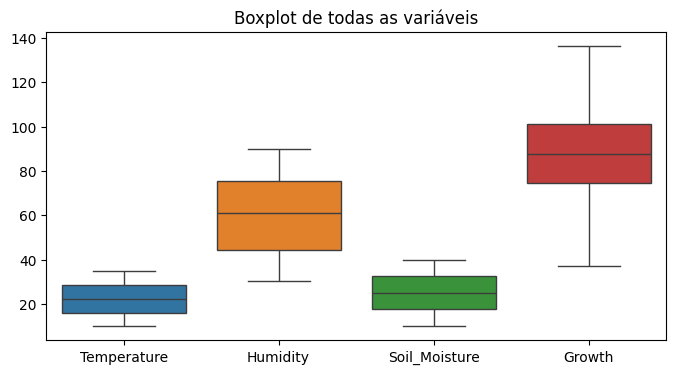

In [ ]:
# Boxplot para identificar outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=df)
plt.title('Boxplot de todas as variáveis')
plt.show()


###Regressão Linear

Selecionando a variável **humidade** (independente) e **crescimento** (dependente) para treinar o modelo

In [ ]:
# Definindo a variável independente (features) e a variável dependente (target/alvo)
X = df[['Humidity']]
y = df['Growth']


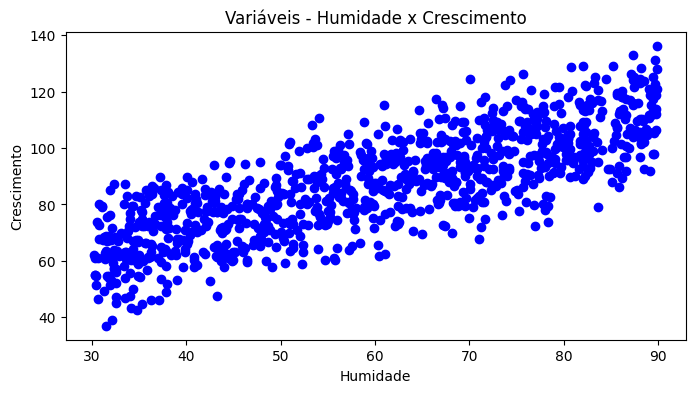

In [ ]:
# Plotando a variáveis X e y
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue')
plt.xlabel('Humidade')
plt.ylabel('Crescimento')
plt.title('Variáveis - Humidade x Crescimento')
plt.show()

In [ ]:
# Dividindo o dataset em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

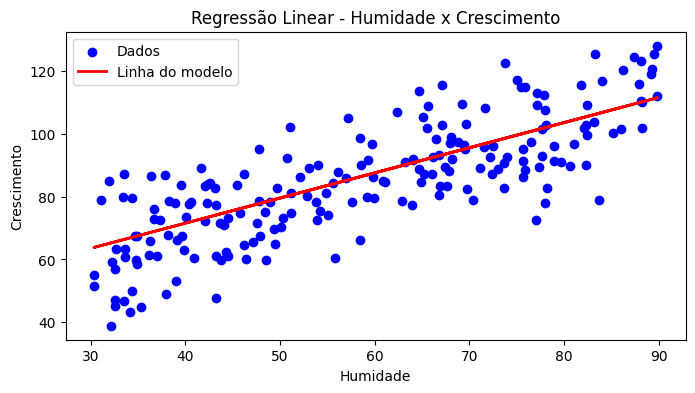

In [ ]:
# Plotando os dados de treinamento e a linha do modelo
plt.figure(figsize=(8, 4))
plt.scatter(X_test, y_test, color='blue', label='Dados')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha do modelo')
plt.xlabel('Humidade')
plt.ylabel('Crescimento')
plt.title('Regressão Linear - Humidade x Crescimento')
plt.legend()
plt.show()


Métricas

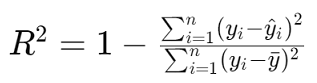

**R-squared (R²)** - Representa a proporção da variância dos dados dependentes que é explicada pelo modelo.

**R² = 1** - O modelo explica perfeitamente toda a variância dos dados.

**R² = 0** - O modelo não explica nenhuma variância além da média dos dados.

**R² < 0** - O modelo tem desempenho pior do que um modelo simples que prevê a média dos dados.

In [ ]:
# Calculando métricas de avaliação
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

R-squared (R²): 0.6280794185369023


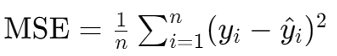

**Mean Squared Error (MSE)** - O erro quadrático médio (MSE) mede a média dos quadrados dos erros entre os valores previstos pelo modelo e os valores reais observados. O MSE é sensível a *outliers*.

In [ ]:
# Calculando métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 131.53287063880364


###Árvores de Regressão

In [ ]:
# Definir as variáveis independentes (features) e a variável dependente (target/alvo)
X = df.drop(columns=['Growth'])
y = df['Growth']


In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Criando o modelo Regressor de Árvore de Decisão
tree_regressor = DecisionTreeRegressor(random_state=42, max_depth=3) #max_depth, limita a profundidade máxima que a árvore pode atingir

# Treinando o modelo
tree_regressor.fit(X_train, y_train)

# Fazendo previsões
y_pred = tree_regressor.predict(X_test)


Visualizando a árvore - Interpretabilidade

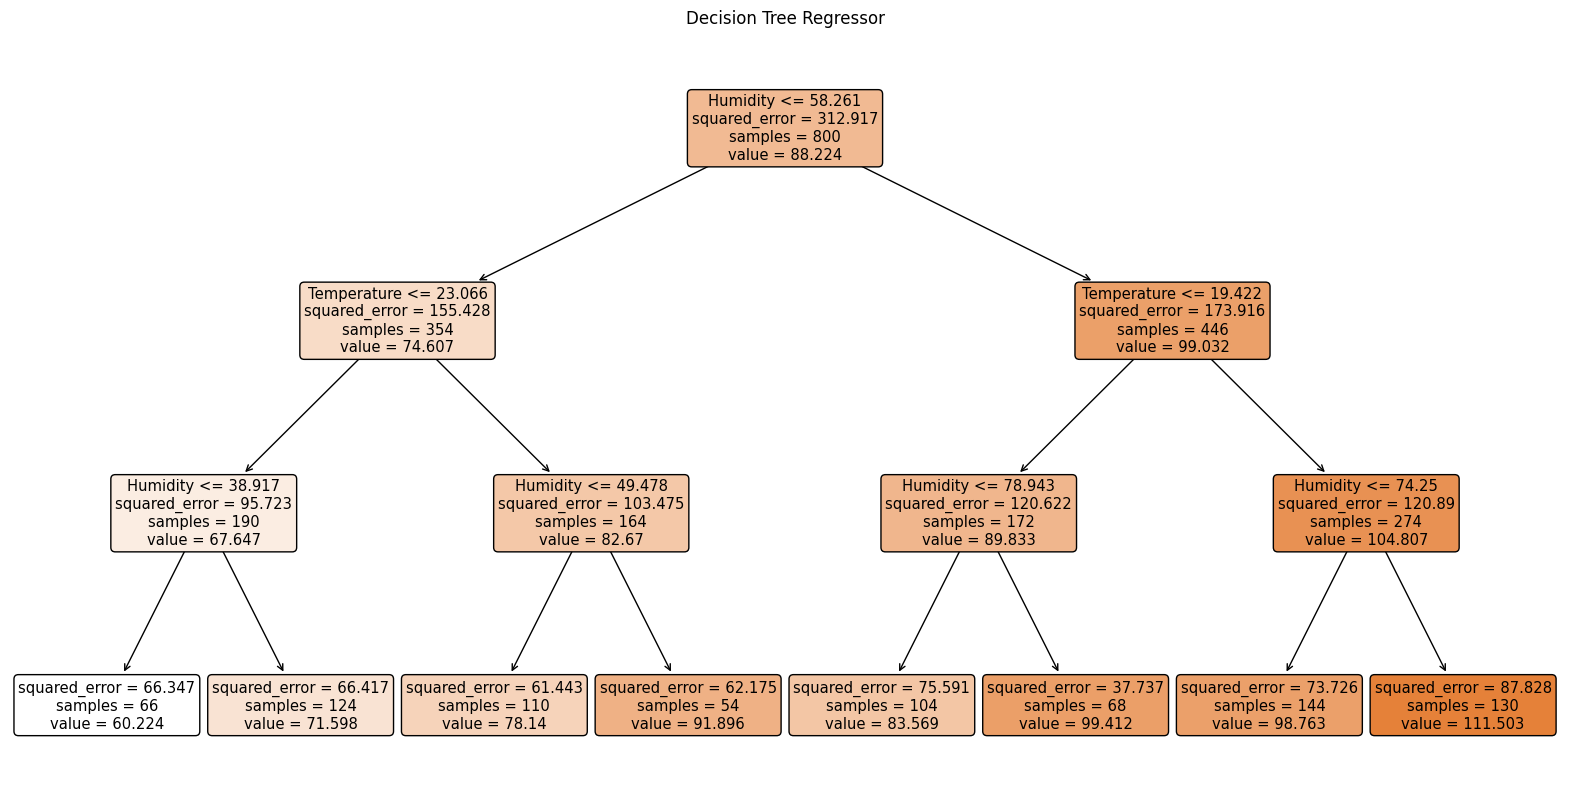

In [ ]:
# Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Regressor')
plt.show()


In [ ]:
# Gerar a árvore de decisão para o formato de texto
tree_text = export_text(tree_regressor, feature_names=list(X.columns))
print(tree_text)


|--- Humidity <= 58.26
|   |--- Temperature <= 23.07
|   |   |--- Humidity <= 38.92
|   |   |   |--- value: [60.22]
|   |   |--- Humidity >  38.92
|   |   |   |--- value: [71.60]
|   |--- Temperature >  23.07
|   |   |--- Humidity <= 49.48
|   |   |   |--- value: [78.14]
|   |   |--- Humidity >  49.48
|   |   |   |--- value: [91.90]
|--- Humidity >  58.26
|   |--- Temperature <= 19.42
|   |   |--- Humidity <= 78.94
|   |   |   |--- value: [83.57]
|   |   |--- Humidity >  78.94
|   |   |   |--- value: [99.41]
|   |--- Temperature >  19.42
|   |   |--- Humidity <= 74.25
|   |   |   |--- value: [98.76]
|   |   |--- Humidity >  74.25
|   |   |   |--- value: [111.50]



Após treinar o modelo de árvore de regressão, é possível entender quais variáveis mais contribuíram para as previsões do modelo.

In [ ]:
# Verificando a importância das variáveis
feature_importances = pd.Series(tree_regressor.feature_importances_, index=X.columns)

print("Importância das Variáveis:")
print(feature_importances.sort_values(ascending=False))


Importância das Variáveis:
Humidity         0.776777
Temperature      0.223223
Soil_Moisture    0.000000
dtype: float64


Métricas

In [ ]:
# Calculando métricas de avaliação
r2 = r2_score(y_test, y_pred)
print(f"R-quadrado (R²): {r2}")


R-quadrado (R²): 0.7538341473708837


In [ ]:
# Calculando métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse}")


Erro Quadrático Médio (MSE): 87.05864333235083
